In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
## Load Data
train=pd.read_csv(r'train.csv')
test=pd.read_csv(r'test.csv')

## Data Discriptions
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

In [4]:
train.head()
train.columns
train.shape

(891, 12)

### PassengerId

In [5]:
train["PassengerId"].head()
train["PassengerId"].shape

train.drop(["PassengerId"],axis=1,inplace=True)
test.drop(["PassengerId"],axis=1,inplace=True)

### Pclass

In [207]:
train["Pclass"].head()    
train["Pclass"].dtype           ## int & var-type= ordinal category
train["Pclass"].isna().sum()    # No null value
train["Pclass"].isna().sum()    # No null value

train["Pclass"].value_counts()  # 1:216; 2:184; 3:491
test["Pclass"].value_counts()  # 1:107; 2:93; 3:218

3    218
1    107
2     93
Name: Pclass, dtype: int64

Probably independent(H1)


(-0.3235331843940954, 3.932785644652632e-24)

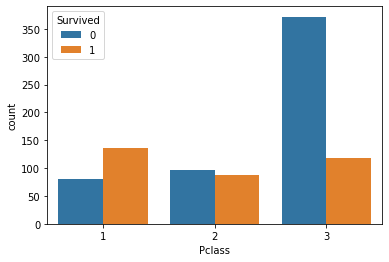

In [208]:
## visualization
sns.countplot(x=train["Pclass"],hue=train["Survived"],data=train)

pd.crosstab(train["Survived"],train["Pclass"])

# Survival Rates with in each class: class1=.63; class2=.47; class3=.24
# Survival Rates from total survived(342): class1=.39; class2=.25; class3=.34

## Correlation: As both features are ordinal
import scipy

cor,p_value=scipy.stats.kendalltau(train["Pclass"],train["Survived"])  # cor: Kendall's tau   & p_val: p-value
if p_value > 0.05:
    print('Probably independent(H0)')
else:
    print('Probably independent(H1)')
cor,p_value


In [209]:
# Summary
# Shows class-3 people tends to less survival chances
# Shows class-1 people tends to more survival chances

### Name

In [210]:
train.drop(["Name"],axis=1,inplace=True)
test.drop(["Name"],axis=1,inplace=True)

In [211]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [212]:
## Sex
train["Sex"].shape            # total record 891
train["Sex"].isna().sum()     # No null values
test["Sex"].isna().sum()     # No null values

train["Sex"].value_counts()  # male:577; female:314
test["Sex"].value_counts()  # male:266; female:152

pd.crosstab(train["Survived"],train["Sex"])
# Survival ratio from all survived(342): Female=.68; Male=32 

# Ordinal Encoding : Male=0 ; Female=1
def sex_encoder(data):
    mapper={"male":0,"female":1}  
    data["Sex"]=data["Sex"].replace(mapper) 
    return data

sex_encoder(train)
sex_encoder(test)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,0,34.5,0,0,330911,7.8292,NaN,Q
1,3,1,47.0,1,0,363272,7.0000,NaN,S
2,2,0,62.0,0,0,240276,9.6875,NaN,Q
3,3,0,27.0,0,0,315154,8.6625,NaN,S
4,3,1,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1,1,39.0,0,0,PC 17758,108.9000,C105,C
415,3,0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,3,0,NaN,0,0,359309,8.0500,NaN,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

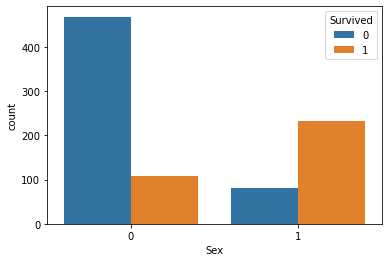

In [213]:
## visualization
sns.countplot(x=train["Sex"],hue=train["Survived"],data=train)

In [214]:
##   Summary
# Females are more likely to survive from this disaster

### Age

In [215]:
train["Age"].isna().sum()    # 177 Null values
test["Age"].isna().sum()    # 86 Null values
train["Age"].describe()      

## Rounding Age values 
train["Age"]=round(train["Age"])+1
test["Age"]=round(test["Age"])+1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
train["Age"]=imputer.fit_transform(train[["Age"]])
test["Age"]=imputer.fit_transform(test[["Age"]])

## Changing type
train['Age']=train['Age'].astype(int)
test['Age']=test['Age'].astype(int)


<AxesSubplot:xlabel='Age', ylabel='Density'>

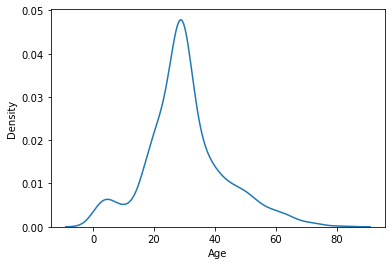

In [216]:
## Plot
sns.kdeplot(x=train["Age"],data=train)    # Along X-axis


### SibSp:

In [217]:
train["SibSp"].head()

train["SibSp"].isna().sum() # No null values
test["SibSp"].isna().sum() # No null values

train[["SibSp"]].info()     # int dtype

train["SibSp"].describe()

train["SibSp"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["SibSp"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   SibSp   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


<AxesSubplot:xlabel='SibSp', ylabel='count'>

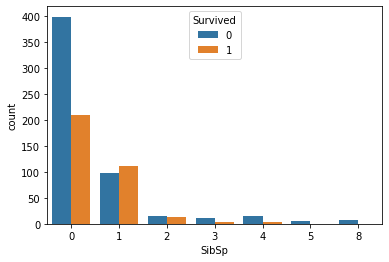

In [218]:
## ploting
sns.countplot(x=train["SibSp"],hue=train["Survived"],data=train)

In [219]:
## Summary
# travelling Alone(608) & Survuved(210) : .35
# travelling Not-Alone(283) & Survuved(132) : .47

# Travelling alone less survival chances

### Parch

In [220]:
train["Parch"].head()

train["Parch"].isna().sum()     # No null value
test["Parch"].isna().sum()     # No null value

train[["Parch"]].info()         # int dtype

train["Parch"].describe()

train["Parch"].value_counts()  # [0,1,2,3,4,5,8]
pd.crosstab(train["Survived"],train["Parch"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Parch   891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445,53,40,2,4,4,1
1,233,65,40,3,0,1,0


<AxesSubplot:xlabel='Parch', ylabel='count'>

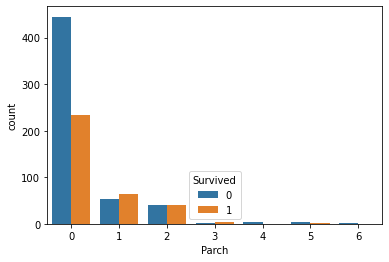

In [221]:
## ploting
sns.countplot(x=train["Parch"],hue=train["Survived"],data=train)

In [222]:
## Summary
# travelling Alone(678) & Survuved : .34
# travelling Not-Alone(213) & Survuved : .51

# Travelling alone less survival chances

### Ticket :

In [223]:
train.drop(["Ticket"],axis=1,inplace=True)
test.drop(["Ticket"],axis=1,inplace=True)

## Fare :

In [224]:
train["Fare"].head()

train["Fare"].isna().sum()    # No null values
test["Fare"].isna().sum()    # 1

## Impute missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
test["Fare"]=imputer.fit_transform(test[["Fare"]])

train[["Fare"]].info()        # int dtype

test["Fare"].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fare    891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


count    418.000000
mean      35.576535
std       55.850103
min        0.000000
25%        7.895800
50%       14.454200
75%       31.471875
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Fare', ylabel='Density'>

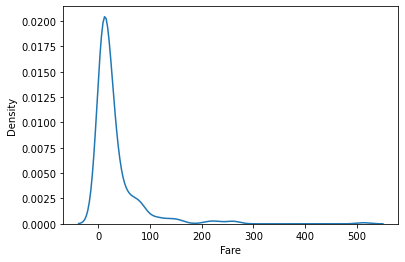

In [225]:
## Plot
sns.kdeplot(x="Fare",data=train)    # Along X-axis


### Cabin 

In [226]:
train["Cabin"].head()

train["Cabin"].isna().sum()    # 687
test["Cabin"].isna().sum()    # 327

train.drop(["Cabin"],axis=1,inplace=True)
test.drop(["Cabin"],axis=1,inplace=True)

### Embarked

In [227]:
train["Embarked"].head()

train["Embarked"].isna().sum()     # 2
test["Embarked"].isna().sum()     # No null value

## Filling missing values
train["Embarked"].fillna(value="C",inplace=True)

train[["Embarked"]].info()         # Ordinal Category

train["Embarked"].describe()


train["Embarked"].value_counts()  # ["C" , "Q" , "S"]
pd.crosstab(train["Survived"],train["Embarked"])

# Embarked Encoder
def embarked_encoder(data):
    df=pd.get_dummies(data=data["Embarked"],prefix='Embarked')
    data=pd.concat([data,df],axis=1) 
    data.drop(["Embarked"],axis=1,inplace=True)
    return data
    
train=embarked_encoder(train)
test=embarked_encoder(test)

#train.Embarked_Q.value_counts()   # 0:814 ; 1:77
#train.Embarked_S.value_counts()   # 0:247 ; 1:644 
#train.Embarked_C.value_counts()   # 0:721 ; 1:170

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Embarked  891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [228]:
## ploting
sns.countplot(x=train["Embarked"],hue=train["Survived"],data=train)

KeyError: 'Embarked'

In [232]:
## Summary
# Survival rate for Embarked=="C" => .55
# Survival rate for Embarked=="S" => .34
# Survival rate for Embarked=="Q" => .39

# Pepole Embarked from "Queensland" having greater survival rate

### Survived

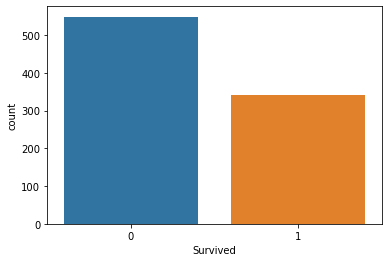

In [231]:
train["Survived"].head()

train["Survived"].isna().sum()    # no null-values

train["Survived"].value_counts()  # 0:549; 1:342

## plot
sns.countplot(x=train["Survived"],data=train)

# cutting out "Survived" and making as target(y)
target=train.pop("Survived")

## Model Training

### Logistic Reg.

In [233]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(random_state=21,multi_class="auto",C=2,dual=False,max_iter=50,penalty='l2',solver='lbfgs').fit(train,target)
y_pred=model.predict(test)
y_proba=model.predict_proba(test)          # Probability estimates.


C:\Users\JokeRR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [234]:
model.coef_          #(ndarray) Coefficient of features in decision function
model.intercept_     #(ndarray) Intercept|bias added to the decision function
model.n_iter_        #(ndarray) Actual number of iterations for all classes
model.classes_       #(ndarray) class labels 
### 79.33 %

array([0, 1], dtype=int64)

In [ ]:
### SVC

In [117]:
from sklearn.svm import SVC
model=SVC(probability=True).fit(train,target)              ##train model
ypred=model.predict(test)  # prediction

model.predict_proba(test) # predict probability class(if probability=True)


array([[0.70952415, 0.29047585],
       [0.70556827, 0.29443173],
       [0.7041067 , 0.2958933 ],
       [0.71050581, 0.28949419],
       [0.70070019, 0.29929981],
       [0.68415104, 0.31584896],
       [0.6991983 , 0.3008017 ],
       [0.65587672, 0.34412328],
       [0.68354665, 0.31645335],
       [0.68445484, 0.31554516],
       [0.71075518, 0.28924482],
       [0.684221  , 0.315779  ],
       [0.24037755, 0.75962245],
       [0.71556389, 0.28443611],
       [0.38854019, 0.61145981],
       [0.64033207, 0.35966793],
       [0.70507186, 0.29492814],
       [0.69911523, 0.30088477],
       [0.70910765, 0.29089235],
       [0.69693327, 0.30306673],
       [0.43286047, 0.56713953],
       [0.66885606, 0.33114394],
       [0.61166941, 0.38833059],
       [0.35131079, 0.64868921],
       [0.25957439, 0.74042561],
       [0.72111345, 0.27888655],
       [0.33865761, 0.66134239],
       [0.70076888, 0.29923112],
       [0.65379231, 0.34620769],
       [0.70078542, 0.29921458],
       [0.

In [ ]:
## Random Forest

In [236]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=True,class_weight='balanced_subsample',criterion='gini',max_features='log2',n_estimators=100).fit(train,target)         ## Train model
Ypred=model.predict(test)                       ##  prediction
model.predict_proba(test)           # Predict class probabilities

## After Tuning: Score increased 79.44 to 82.
#{'bootstrap'=True,'class_weight'='balanced_subsample','criterion'='gini','max_features'='log2','n_estimators'=100}


array([[9.50000000e-01, 5.00000000e-02],
       [8.35236123e-01, 1.64763877e-01],
       [7.60000000e-01, 2.40000000e-01],
       [3.20000000e-01, 6.80000000e-01],
       [5.70000000e-01, 4.30000000e-01],
       [9.15016835e-01, 8.49831650e-02],
       [8.51760243e-01, 1.48239757e-01],
       [9.30000000e-01, 7.00000000e-02],
       [1.90000000e-01, 8.10000000e-01],
       [9.76835675e-01, 2.31643250e-02],
       [9.40000000e-01, 6.00000000e-02],
       [8.92186953e-01, 1.07813047e-01],
       [1.00000000e-02, 9.90000000e-01],
       [8.70000000e-01, 1.30000000e-01],
       [1.00000000e-02, 9.90000000e-01],
       [6.00000000e-02, 9.40000000e-01],
       [9.60680524e-01, 3.93194763e-02],
       [3.30000000e-01, 6.70000000e-01],
       [6.50000000e-01, 3.50000000e-01],
       [4.61760243e-01, 5.38239757e-01],
       [4.00000000e-01, 6.00000000e-01],
       [4.12281185e-01, 5.87718815e-01],
       [4.16724913e-02, 9.58327509e-01],
       [4.20000000e-01, 5.80000000e-01],
       [5.000000

## Hyperparameter Tuning:

In [127]:
from sklearn.model_selection import GridSearchCV

## {'parameter_name'=[possible values]}
param_grid={"criterion":["gini","entropy"],
            "max_features":["auto","sqrt","log2"],
            "class_weight":["balanced",'balanced_subsample'],
            "n_estimators":[50,100,150,200,250,300,400,500],
            "bootstrap":[True,False]
           }

# np.logspace(0,4,10)  # generate float
# np.arange(0,15)      # generate int


gscv=GridSearchCV(model,param_grid,cv=10,verbose=0,refit=False)  
best=gscv.fit(train,target)

In [129]:
#best.best_estimator_               ## best model(if refit=True)
best.best_score_                   ## mean cv score((if refit=True))
best.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 'log2',
 'n_estimators': 100}

## Model Evaluation : 

In [237]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=25,shuffle=True) 
score=cross_val_score(model,train,target,cv=kf,n_jobs=-1,verbose=0,fit_params=None)
score.mean()                           # mean score


0.8124444444444445

## Transform prediction for kaggle submision:


In [38]:
submission=pd.DataFrame({"Survived":y_pred})
submission.to_csv('submission_v0.csv',index=False)
#"PassengerId":test["PassengerId"],

In [ ]:
submission=pd.read_csv('submission_v0.csv')
submission

In [ ]:
## Saving Model

In [133]:
import pickle
pickle_out=open("titanic_v0.pkl","wb")
pickle.dump(model,pickle_out)
pickle_out.close()